In [1]:
import numpy as np
import math
from GRAPE import *
import matplotlib.pyplot as plt
from qiskit import Aer, execute
import warnings
warnings.filterwarnings('ignore')

In [2]:
H = math.sqrt(0.5)*np.array([1,1,1,-1]).reshape(2,2)
X = np.array([0,1,1,0]).reshape(2,2)
Y = np.array([0,-1j,1j,0]).reshape(2,2)
Z = np.array([1,0,0,-1]).reshape(2,2)
U = np.linalg.eig(H)[1].conj().T

CX = np.eye(4)
CX[2][2] = 0
CX[3][3] = 0
CX[2][3] = 1
CX[3][2] = 1

CZ = np.eye(4)
CZ[3][3] = -1

CCZ = np.eye(8)
CCZ[7][7] = -1

TOFFOLI = np.eye(8)
TOFFOLI[6][6] = 0
TOFFOLI[7][7] = 0
TOFFOLI[6][7] = 1
TOFFOLI[7][6] = 1

U1 = np.kron(np.kron(X,U),np.eye(2))
V1 = CCZ
Ud1 = U1.conj().T

U2 = np.kron(np.kron(X,U),np.eye(2))
V2 = np.kron(CZ,np.eye(2))
Ud2 = U2.conj().T


U3 = np.kron(np.kron(np.eye(2),U),np.eye(2))
V3 = np.kron(np.eye(2),CZ)
Ud3 = U3.conj().T

U4 = np.kron(np.kron(np.eye(2),U),np.eye(2))
V4 = np.kron(CZ,np.eye(2)) @ np.kron(np.eye(2),CZ)
Ud4 = U4.conj().T

U5 = np.kron(np.kron(np.eye(2),X @ U),np.eye(2))
V5 = CCZ
Ud5 = U5.conj().T

J = np.zeros((3, 3))
J[0][1] = 0.1385
J[1][2] = 0.01304
J[0][2] = 0.00148

gates = [[U1, V1, Ud1], [U2, V2, Ud2], [U3, V3, Ud3], [U4, V4, Ud4], [U5, V5, Ud5]]

2 2 :

Choose descent 190 : time=149.39954533565137, distance=(0.2318467256055189+0j)
Distance: 0.1130563377163486; Time: 147.99890881005177
5 0 :

Choose descent 25 : time=135.15889747248244, distance=(0.8646507119232718+0j)
Distance: 0.0046353111930881215; Time: 136.2466740627227
5 2 :

Choose descent 197 : time=100.7389194248212, distance=(0.2379234835711778+0j)
Distance: 0.01823360791981571; Time: 100.35925298471584


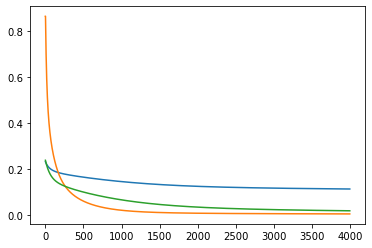

In [5]:
indices = ["U", "V", "Ud"]
for number, index in [[2, 2], [5, 0], [5, 2]]:
    if True:
        print(number, index, ":\n")

        n = 200
        m = 200
        k = 6

        descents = [GradientDescent(gates[number - 1][index], k) for _ in range(n)]

        for descent in descents:
            descent.noise = 1
            descent.randomize_params()
            descent.set_j(J)

        losses = [descent.descend(steps=m, track_distance=True, time_sensitive=True) for descent in descents]

        #for loss in losses:
         #   plt.plot(np.real(loss[10:]))


        t_min = 600
        p_min = -1
        for i in range(n):
            if descents[i].time < 600 and descents[i].distance < 1:
                descents[i].make_times_positive()
                if descents[i].time < t_min:
                    t_min = descents[i].time
                    p_min = i
                #print("i: ", i, " ; distance:", descents[i].distance.round(6).real, "; time:", descents[i].time.round(2))
        print(f"Choose descent {p_min} : time={descents[p_min].time}, distance={descents[p_min].distance}")


        descent = descents[p_min]

        loss = descent.descend(steps=4000, track_distance=True, time_sensitive=False)
        plt.plot(np.real(loss))

        print(f"Distance: {descent.distance.real}; Time: {descent.time.real}")
        descent.to_text(f"./Oleg/{indices[index]}{number}.oleg")



